In [3]:
import peakutils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import peakutils
from peakutils.plot import plot as pplot



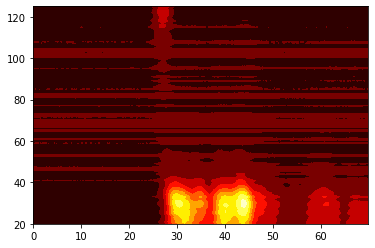

In [4]:
data = pd.read_csv("sample_data_2.csv.csv", index_col=0)

data.columns = data.columns.astype(np.float)
data = data.loc[:,:70]
x,y = np.meshgrid(data.columns,data.index)
plt.contourf(x, y, data.values, cmap=cm.hot)

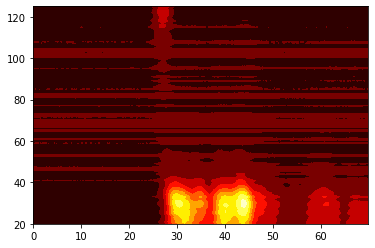

In [5]:
# Baseline subtraction
data_v = data.values - np.min(data.values, axis=1)[:, None]
plt.contourf(x, y, data.values, cmap=cm.hot)

In [6]:
xth_datapoint = 200
data.columns[xth_datapoint]


41.577441726920725

In [7]:
data_v[:,xth_datapoint]
data.columns[xth_datapoint]

41.577441726920725

In [8]:
# Calculate noise baseline
noise = data_v.std()
# mean = data_v.median()
# mean/noise
# SNR = self.data.mean()/self.data.std()

In [9]:
#Peak search at 41.57 meter
indexes = peakutils.indexes(data_v[:,xth_datapoint], thres=noise*5, min_dist=30)
type(indexes)

numpy.ndarray

In [ ]:
print(data.index[indexes], data_v[:,xth_datapoint][indexes])
plt.plot(data.index, data_v[:,xth_datapoint])
pplot(data.index, data_v[:,xth_datapoint], indexes)

In [92]:
max_temp = data.index[indexes[-1]]
print(max_temp)

28.0


In [134]:
#loop peak search
temperature = np.zeros((len(data.columns)))
for i in range(0, len(data.columns)):
    # print(peakutils.indexes(data_v[x,xth_datapoint], thres=noise*5, min_dist=30)[-1])
    temperature[i] = (data.index[peakutils.indexes(data_v[:,i], thres=noise*20, min_dist=1)[-1]])



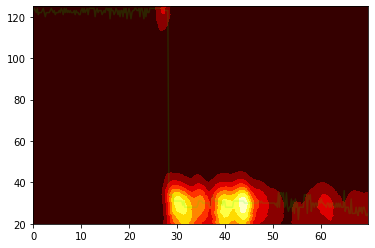

In [135]:
plt.contourf(x, y, data_v, cmap=cm.hot)
plt.plot(data.columns,temperature, color="#00ff0025")


In [ ]:
#gaussian loop
temperature = np.zeros((len(data.columns)))
for i in range(0, len(data.columns)):
    # print(peakutils.indexes(data_v[x,xth_datapoint], thres=noise*5, min_dist=30)[-1])
    temperature[i] = (data.index[peakutils.indexes(data_v[:,i], thres=noise*20, min_dist=1)[-1]])
